In [1]:
import torch
torch.__version__

'2.1.1+cpu'

In [2]:
!nvidia-smi

Mon Nov 20 10:11:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 529.08       Driver Version: 529.08       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Linear Regression in Torch:

In [4]:
weight = torch.rand(1).item()
bias = torch.rand(1).item()

X = torch.arange(0,10, 0.2).unsqueeze(dim=1)
y = weight*X + bias

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 shuffle=True,
                                                 stratify=None)

print(len(X_train), len(X_test), len(y_train), len(y_test))

40 10 40 10


In [5]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Train Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    plt.legend(prop={'size':14})

In [6]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                                  dtype=torch.float32,
                                                  requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype = torch.float32))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias

model_0 = LinearRegressionModel().to(device)
print(model_0.state_dict(), '\n', model_0.parameters)

OrderedDict([('weight', tensor([-0.2618])), ('bias', tensor([-0.4629]))]) 
 <bound method Module.parameters of LinearRegressionModel()>


In [7]:
import torch.nn as nn
class LinearRegressionModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.Layer1(x)

model_1 = LinearRegressionModelV1().to(device)
print(model_1.state_dict(), "\n", model_1.parameters)

OrderedDict([('Layer1.weight', tensor([[0.4816]])), ('Layer1.bias', tensor([-0.8975]))]) 
 <bound method Module.parameters of LinearRegressionModelV1(
  (Layer1): Linear(in_features=1, out_features=1, bias=True)
)>


In [8]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear1 = nn.Linear(in_features=1, out_features=4)
        self.Linear2 = nn.Linear(in_features=4, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.Linear2(self.Linear1(x))

model_2 = LinearRegressionModelV2()
print(model_2.state_dict(), '\n', model_2.parameters)

OrderedDict([('Linear1.weight', tensor([[ 0.4177],
        [ 0.3063],
        [-0.4856],
        [ 0.9787]])), ('Linear1.bias', tensor([-0.8836, -0.8436, -0.2166, -0.8352])), ('Linear2.weight', tensor([[-0.4410,  0.4895,  0.0558, -0.2022]])), ('Linear2.bias', tensor([0.0857]))]) 
 <bound method Module.parameters of LinearRegressionModelV2(
  (Linear1): Linear(in_features=1, out_features=4, bias=True)
  (Linear2): Linear(in_features=4, out_features=1, bias=True)
)>


In [15]:
lr = 0.0001
loss_fn = nn.L1Loss()
optimizer0 = torch.optim.SGD(params=model_0.parameters(), lr=lr)
optimizer1 = torch.optim.SGD(params=model_1.parameters(), lr=lr)
optimizer2 = torch.optim.SGD(params=model_2.parameters(), lr=lr)

epoch: 0 | loss: 0.8926016092300415 | test loss: 0.995367705821991
epoch: 10 | loss: 0.8693702816963196 | test loss: 0.9677750468254089
epoch: 20 | loss: 0.846139132976532 | test loss: 0.9401825070381165
epoch: 30 | loss: 0.8229078054428101 | test loss: 0.9125898480415344
epoch: 40 | loss: 0.7996767163276672 | test loss: 0.8849972486495972
epoch: 50 | loss: 0.7764455080032349 | test loss: 0.8574047088623047
epoch: 60 | loss: 0.7532142400741577 | test loss: 0.8298120498657227
epoch: 70 | loss: 0.7299830317497253 | test loss: 0.8022193908691406
epoch: 80 | loss: 0.7067518830299377 | test loss: 0.7746268510818481
epoch: 90 | loss: 0.6835205554962158 | test loss: 0.7470342516899109
epoch: 100 | loss: 0.6602894067764282 | test loss: 0.7194415330886841
epoch: 110 | loss: 0.6370581388473511 | test loss: 0.691848874092102
epoch: 120 | loss: 0.6138269901275635 | test loss: 0.6642563939094543
epoch: 130 | loss: 0.5905956625938416 | test loss: 0.6366637945175171
epoch: 140 | loss: 0.5673645734786

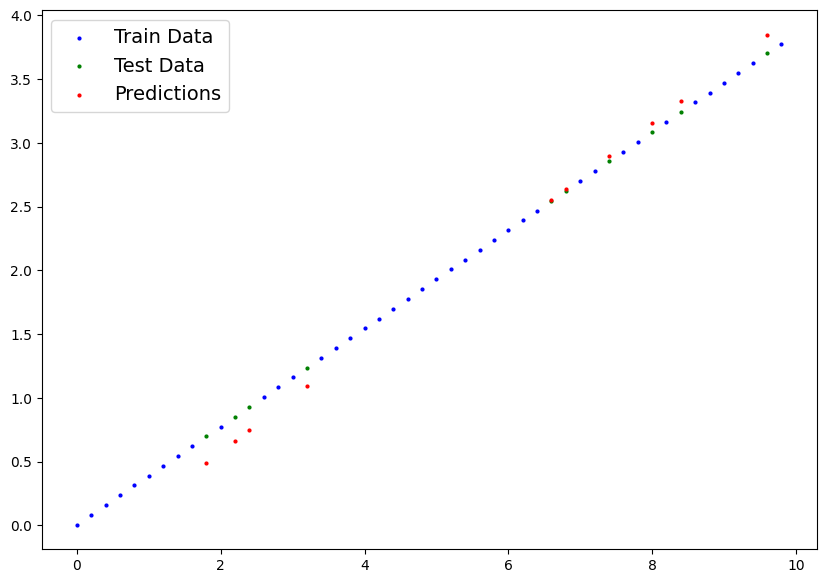

In [18]:
epochs = 1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epoch_count = []
train_loss_values = []
test_loss_values = []

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    
    model_0.train()

    preds = model_0(X_train)
    loss = loss_fn(preds, y_train)
    optimizer0.zero_grad()
    loss.backward()
    optimizer0.step()
    
   
    
    model_0.eval()
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)
    
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)

    if epoch%10 == 0:
        print(f'epoch: {epoch} | loss: {loss} | test loss: {test_loss}')


    
model_0.eval()
with torch.inference_mode():
    pred_plot = model_0(X_test)
plot_predictions(predictions=pred_plot)


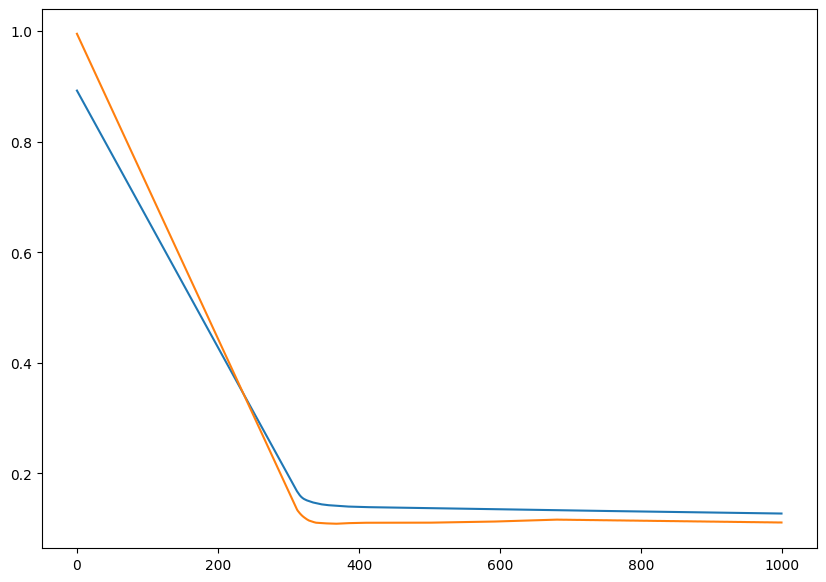

In [19]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count, torch.tensor(train_loss_values).cpu().numpy())
plt.plot(epoch_count, test_loss_values)

In [20]:
from pathlib import Path
MODEL_PATH = Path('practicebook_models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = 'model_0_20-11-23_LRmodel.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME


print('Saving model to path...')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
print('Saved Model')

Saving model to path...
Saved Model


In [25]:
load_model_0 = LinearRegressionModel()
print('loading model 0')
load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f'Loaded model_0, \n{load_model_0.state_dict()}\n{load_model_0.parameters}')

loading model 0
Loaded model_0, 
OrderedDict([('weight', tensor([0.4307])), ('bias', tensor([-0.2870]))])
<bound method Module.parameters of LinearRegressionModel()>


# Tackling Classification Problem

In [26]:
import torch
torch.__version__

'2.1.1+cpu'

In [27]:
!nvidia-smi

Mon Nov 20 10:25:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 529.08       Driver Version: 529.08       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


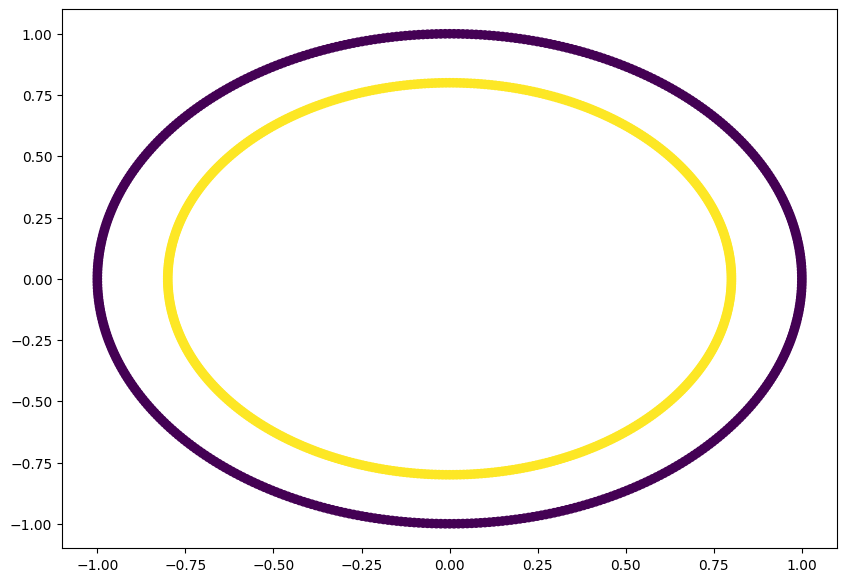

In [30]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, shuffle=True, random_state=42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    stratify=None,
                                                    random_state=42,
                                                    shuffle=True)

from matplotlib import pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=y, cmap='viridis')

In [41]:
X_train, X_test = torch.from_numpy(X_train).to(device), torch.from_numpy(X_test).to(device)
y_train, y_test = torch.from_numpy(y_train).to(device), torch.from_numpy(y_test).to(device)

TypeError: torch._VariableFunctionsClass.from_numpy() takes no keyword arguments

In [36]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.LinearLayer1 = nn.Linear(in_features=2, out_features=8)
        self.LinearLayer2 = nn.Linear(in_features=8, out_features=8)
        self.LinearLayer3 = nn.Linear(in_features=8, out_features=1)
        self.RectifiedLinearUnitLayer = nn.ReLU()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.LinearLayer3(self.RectifiedLinearUnitLayer(self.LinearLayer2(self.RectifiedLinearUnitLayer(self.LinearLayer1(x)))))
    
model_3 = ClassificationModel()
print(model_3.state_dict(), '\n', model_3.parameters)

OrderedDict([('LinearLayer1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]])), ('LinearLayer1.bias', tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])), ('LinearLayer2.weight', tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
        [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
        [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
        [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
        [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218],
        [ 0.1083, -0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178],
        [ 0.3402, -0.2918, -0.3507, -0.2766, -0.2378,  0.1432,  0.1266,  0.2938],
        [-0.1826, -0.2410,  0.187

In [37]:
lr = 0.01
loss_fn = nn.BCEWithLogitsLoss()
optimizer_circles = torch.optim.SGD(params=model_3.parameters(), lr=lr)

In [38]:
def accuracy_fn(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item()
    acc = (correct/len(y_preds))*100
    return acc

In [40]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    
    model_3.train()
    
    preds_logits = model_3(X_train).squeeze()
    preds = torch.round(torch.sigmoid(preds_logits))
    
    loss = loss_fn(preds_logits, y_train)
    acc = accuracy_fn(y_train, preds)
    
    optimizer_circles.zero_grad()
    loss.backward()
    optimizer_circles.step()
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test)
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test, test_preds)
        
    if epoch%10 == 0:
        print(f'epoch:{epoch} | loss: {loss:.5f} | accuracy: {acc:.2f}%')
    

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float